In [1]:
import pandas as pd
#bid=pd.read_csv("/content/drive/MyDrive/Copie de Copie de bids.csv")
#data=pd.read_csv("/content/drive/MyDrive/Copie de Copie de train.csv")

In [2]:

#Merging data with bid on 'bidder_id' using an inner join
#data_bid = pd.merge(data, bid, on='bidder_id', how='inner')

data_bid=pd.read_csv("C:/Users/wardi/Downloads/data_bid.csv")

In [ ]:
import pandas as pd

# Example to convert Unix timestamp to datetime (adjust according to your timestamp format)
# If your timestamp is not in Unix format, this step will need to be modified.
data_bid['datetime'] = pd.to_datetime(data_bid['time']//10000000, unit='s')

data_bid.head()


In [ ]:
# Extracting time features
data_bid['year'] = data_bid['datetime'].dt.year
data_bid['month'] = data_bid['datetime'].dt.month
data_bid['day'] = data_bid['datetime'].dt.day
data_bid['hour'] = data_bid['datetime'].dt.hour
data_bid['weekday'] = data_bid['datetime'].dt.weekday  
data_bid['dayofyear'] = data_bid['datetime'].dt.dayofyear
data_bid['quarter'] = data_bid['datetime'].dt.quarter
data_bid.head()

In [3]:
merchandise_count = data_bid['merchandise'].value_counts()
country_count = data_bid['country'].value_counts()
auction_count = data_bid['auction'].value_counts()
device_count = data_bid['device'].value_counts()

data_bid['merchandise_count'] = data_bid['merchandise'].map(merchandise_count)
data_bid['country_count'] = data_bid['country'].map(country_count)
data_bid['auction_count'] = data_bid['auction'].map(auction_count)
data_bid['device_count'] = data_bid['device'].map(device_count)

In [4]:
data_bid = data_bid.dropna(subset=['country','time'])

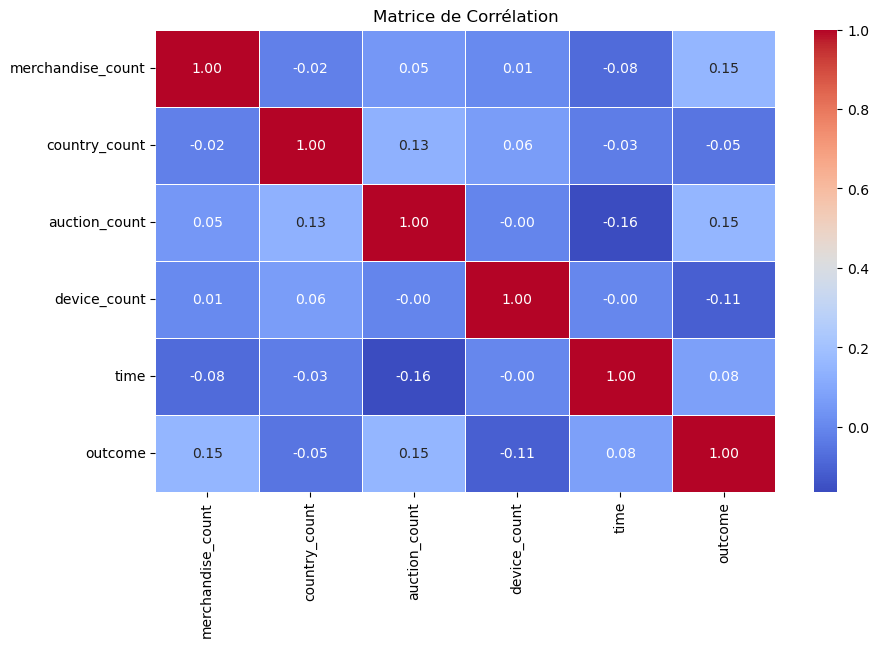

In [5]:
correlation_matrix = data_bid[['merchandise_count', 'country_count', 'auction_count', 'device_count','year','month','day','hour','weekday','dayofyear','quarter','outcome']].corr()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

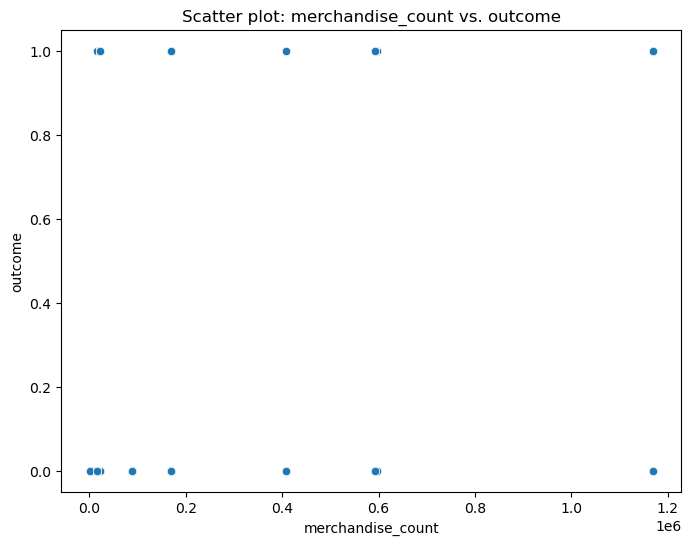

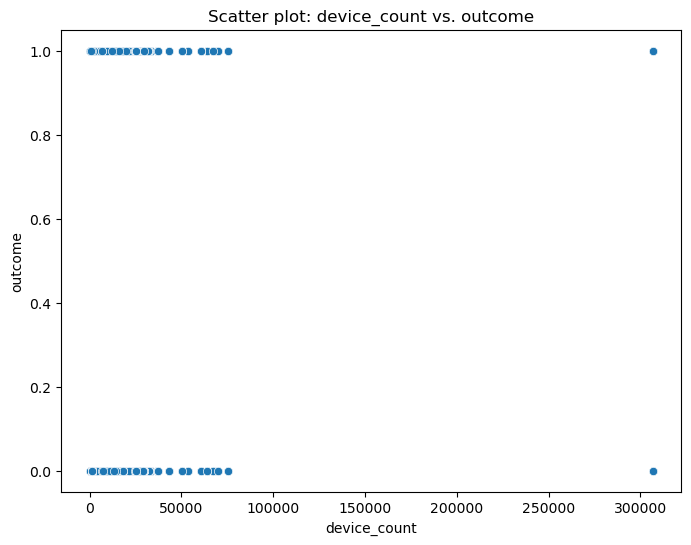

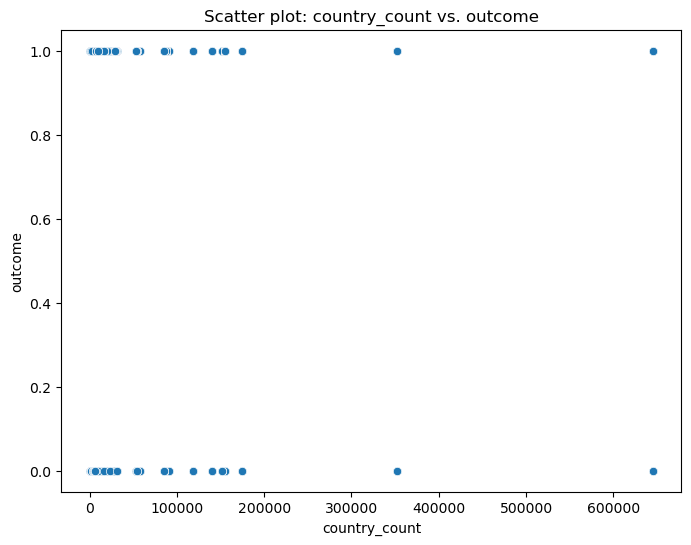

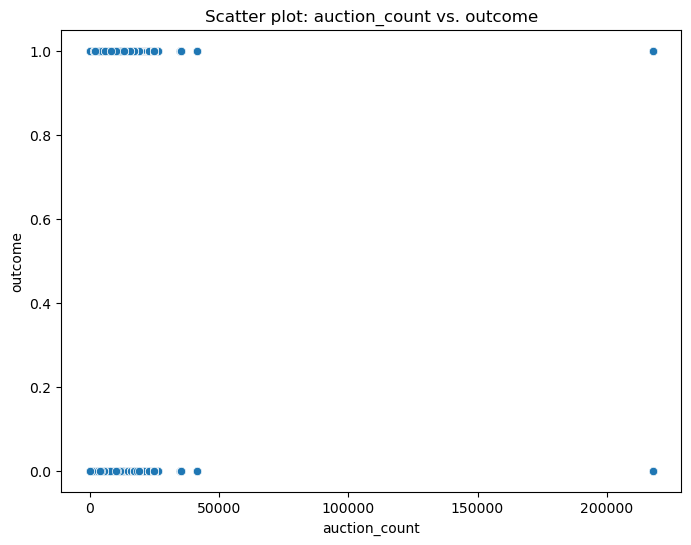

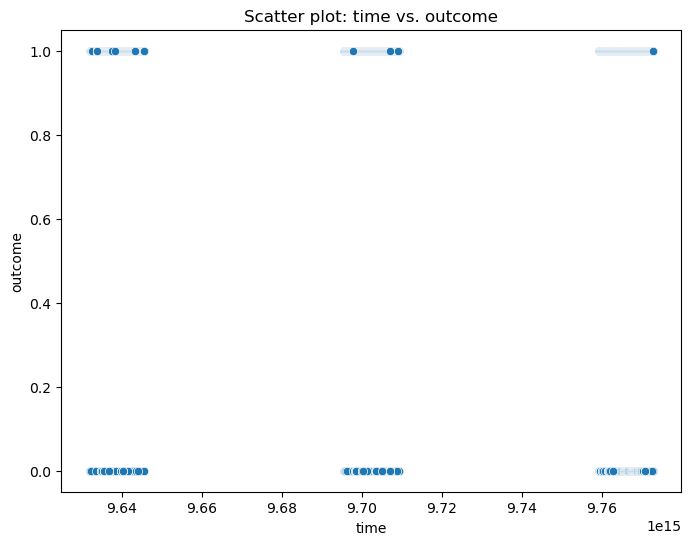

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of features
features = ['merchandise_count', 'device_count', 'country_count', 'auction_count', 'month','day','hour','weekday','dayofyear','quarter']

# Create scatter plots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data_bid, x=feature, y='outcome')
    plt.title(f'Scatter plot: {feature} vs. outcome')
    plt.xlabel(feature)
    plt.ylabel('outcome')
    plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
X = data_bid[['merchandise_count', 'device_count', 'country_count', 'auction_count','month','day','hour','weekday','dayofyear','quarter']]
y = data_bid['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
# Define the Random Forest model and parameters for Grid Search
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [6],
    'min_samples_leaf': [2]
}

# Using StratifiedKFold for handling class imbalance
cv = StratifiedKFold(n_splits=10)

# Grid Search with cross-validation
grid = GridSearchCV(rf_model, param_grid, cv=cv, scoring='roc_auc', verbose=1)
grid.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid.best_params_)
print("Best AUC score found: ", grid.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


KeyboardInterrupt: 

In [ ]:
# Predictions
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)[:, 1]

# Metrics
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"AUC Score: {auc_score}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix RANDOM FOREST:\n{conf_matrix}")


In [ ]:
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(grid, X_test, y_test, cmap=plt.cm.Blues, display_labels=["Class 0", "Class 1"])
plt.title("Confusion Matrix RANDOM FOREST")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic RANDOM FOREST')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"AUC Score: {roc_auc:.2f}")


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# Sélection des caractéristiques et du target
#X = data_bid[['merchandise_count', 'device_count', 'country_count', 'auction_count']]
#y = data_bid['outcome']

# Division des données
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle XGBoost
xgb_model = XGBClassifier(random_state=42)

# Définir la grille de paramètres pour la recherche par grille
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3,  10],
    'learning_rate': [0.01, 0.1],
    'gamma':  [0.1, 0.2]
}

# Utiliser StratifiedKFold pour gérer le déséquilibre des classes
cv = StratifiedKFold(n_splits=10)

# Recherche par grille avec validation croisée
grid = GridSearchCV(xgb_model, param_grid, cv=cv, scoring='roc_auc', verbose=2)
grid.fit(X_train, y_train)

# Meilleurs paramètres et meilleur score
print("Meilleurs paramètres trouvés : ", grid.best_params_)
print("Meilleur score AUC trouvé : ", grid.best_score_)

# Prédictions
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)[:, 1]

# Mesures de performance
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Score AUC : {auc_score}")
print(f"Précision : {precision}")
print(f"Rappel : {recall}")
print(f"Score F1 : {f1}")
print(f"Matrice de confusion XGBOOST:\n{conf_matrix}")


In [ ]:
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(grid, X_test, y_test, cmap=plt.cm.Blues, display_labels=["Class 0", "Class 1"])
plt.title("Confusion Matrix XGBOOST")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic XGBOOST')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"AUC Score: {roc_auc:.2f}")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
import matplotlib.pyplot as plt

# Define the Logistic Regression model and parameters for Grid Search
logistic_model = LogisticRegression()
param_grid = {
    'C': [1.0],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

# Using StratifiedKFold for handling class imbalance
cv = StratifiedKFold(n_splits=10)

# Grid Search with cross-validation
grid = GridSearchCV(logistic_model, param_grid, refit=True, verbose=3, cv=cv)
grid.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid.best_params_)
print("Best accuracy found: ", grid.best_score_)

# Predictions
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)[:, 1]

# Metrics
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"AUC Score: {auc_score}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix Logistic Regression :\n{conf_matrix}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(grid, X_test, y_test, cmap=plt.cm.Blues, display_labels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

# Define the SVM model and parameters for Grid Search
svm_model = SVC(probability=True)  # Enable probability for AUC
param_grid = {'C': [1], 'gamma': [ 0.1], 'kernel': ['sigmoid']}

# Using StratifiedKFold for handling class imbalance
cv = StratifiedKFold(n_splits=10)

# Grid Search with cross-validation
grid = GridSearchCV(svm_model, param_grid, refit=True, verbose=3, cv=cv)
grid.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid.best_params_)
print("Best accuracy found: ", grid.best_score_)


In [ ]:
# Predictions
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)[:, 1]

# Metrics
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"AUC Score: {auc_score}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix SVM :\n{conf_matrix}")


In [ ]:
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(grid, X_test, y_test, cmap=plt.cm.Blues, display_labels=["Class 0", "Class 1"])
plt.title("Confusion Matrix SVM")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic SVM')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"AUC Score: {roc_auc:.2f}")
